In [16]:
#  _           _       _____ _   _ 
# | |         | |     |_   _| | | |
# | |     __ _| |__     | | | | | |
# | |    / _` | '_ \    | | | | | |
# | |___| (_| | |_) |  _| |_\ \_/ /
# \_____/\__,_|_.__/   \___/ \___/  It's all about comparing tweets
# version 1.0
# Lab IV for the course Applied Machine Learning DT4031, Halmstad University


In [17]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# read the downloaded data (download at https://archive.ics.uci.edu/ml/datasets/Health+News+in+Twitter and extract in the working folder to /Health-Tweets)
df_msnhealthnews = pd.read_csv("msnhealthnews.csv", sep="|", header=None, names=['id', 'date', 'tweet_text'], encoding='ISO-8859-1')

In [19]:
# take a look at some tweets
df_msnhealthnews.head(3)

,id,date,tweet_text
0,220146274970763264,Tue Jul 03 13:25:36 +0000 2012,Heavy Coffee Intake May Affect Fertility Treat...
1,220146274236760065,Tue Jul 03 13:25:36 +0000 2012,"Summer Is Peak Time for Teens to Try Drugs, Al..."
2,220146273444040704,Tue Jul 03 13:25:36 +0000 2012,Some Crash-Avoidance Systems May Work Better T...


In [20]:
# "renaming" of the variable (makes sense if other tweet sources are to be added later)
df_tweets = df_msnhealthnews

In [ ]:
# remove web links and tags from the tweets to avoid clustering tweets by those
df_tweets['tweet_text'] = df_tweets['tweet_text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)
df_tweets['tweet_text'] = df_tweets['tweet_text'].str.replace('@(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+:', '', regex=True)
df_tweets['tweet_text'] = df_tweets['tweet_text'].str.replace('RT ', '')
df_tweets['tweet_text'] = df_tweets['tweet_text'].str.lower()
f

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
C:\Users\victo\AppData\Local\Temp\ipykernel_30560\3048686722.py:2: SyntaxWarning: invalid escape sequence '\('
  df_tweets['tweet_text'] = df_tweets['tweet_text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)
C:\Users\victo\AppData\Local\Temp\ipykernel_30560\3048686722.py:3: SyntaxWarning: invalid escape sequence '\('
  df_tweets['tweet_text'] = df_tweets['tweet_text'].str.replace('@(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+:', '', regex=True)


In [ ]:
# initialize the scikit-learn vectorizer which will count words 
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_tweets.tweet_text)
X_feature_names = vectorizer.get_feature_names_out() 

In [23]:
# investigate shape of our "bag of words"
X.shape

(3199, 4147)

In [24]:
# compare to original tweet shape
df_tweets.shape

(3199, 3)

<Figure size 640x480 with 0 Axes>

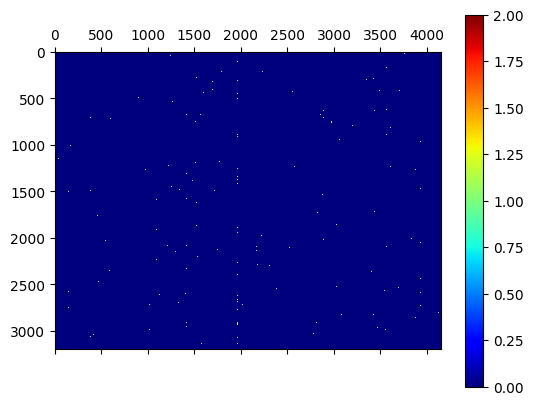

In [25]:
# visulize the bag of words to get an idea of the "sparseness"
plt.figure()
plt.matshow(X.toarray(), cmap='jet')
plt.colorbar()
plt.show()

In [26]:
# feature extraction (reduce the dimensionality from 4120 to 100 dimensions by the use of SVD instead of PCA since the data is "very sparse")
svd = TruncatedSVD(n_components=100)
svd.fit(X)
X_reduced = svd.transform(X)

In [27]:
# inspect the shape of the reduced dataset
X_reduced.shape

(3199, 100)

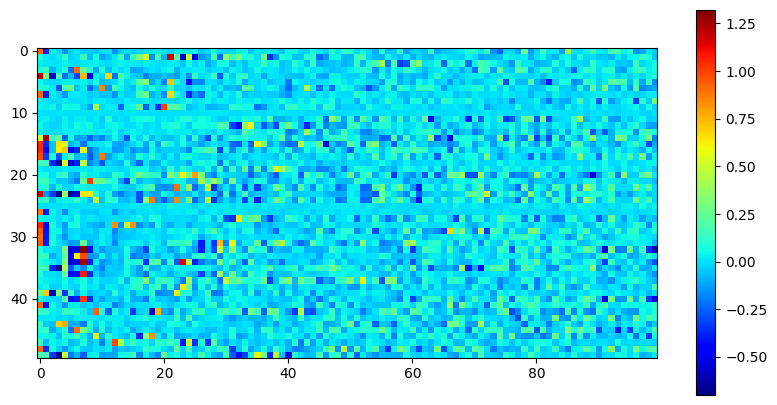

In [28]:
# visualize the first few observations of the reduced dataset
plt.figure(figsize=(10, 5))
plt.imshow(X_reduced[0:50,:], cmap='jet')
plt.colorbar()

In [29]:
# This cell makes the clustering over a set of k (number of clusters) using k-Means.
# The cluster validation metrics stored for each "k" are Calinski-Harabasz, Silhouette and sum of squared distances to nearest cluster center (SSE)

# initialize results lists
calinski_harabasz_result = []
silhouette_results = []
sse_result = []

# define "search range"
cluster_range_start = 2
cluster_range_stop = 75

# do clustering for each "k" and save clustering validation scores
for n_cluster in range(cluster_range_start,cluster_range_stop):
    kmeans_model = KMeans(n_clusters=n_cluster, random_state=42)
    kmeans_model.fit_predict(X_reduced)
    ch_score = metrics.calinski_harabasz_score(X_reduced, kmeans_model.labels_)
    s_score = metrics.silhouette_score(X_reduced, kmeans_model.labels_, metric='euclidean')
    calinski_harabasz_result.append(ch_score)
    silhouette_results.append(s_score)
    sse_result.append(kmeans_model.inertia_)
    print("Calinski-Harabasz score for %d clusters: %2.2f, Silhouette score: %2.2f, SSE score: %2.2f" % (n_cluster, ch_score, s_score, kmeans_model.inertia_))

Calinski-Harabasz score for 2 clusters: 18.40, Silhouette score: 0.07, SSE score: 7293.01
Calinski-Harabasz score for 3 clusters: 151.98, Silhouette score: 0.10, SSE score: 6697.98
Calinski-Harabasz score for 4 clusters: 112.59, Silhouette score: 0.10, SSE score: 6633.68
Calinski-Harabasz score for 5 clusters: 88.85, Silhouette score: 0.09, SSE score: 6600.53
Calinski-Harabasz score for 6 clusters: 100.18, Silhouette score: 0.10, SSE score: 6340.34
Calinski-Harabasz score for 7 clusters: 103.59, Silhouette score: 0.07, SSE score: 6139.53
Calinski-Harabasz score for 8 clusters: 62.40, Silhouette score: 0.09, SSE score: 6451.88
Calinski-Harabasz score for 9 clusters: 56.62, Silhouette score: 0.09, SSE score: 6422.98
Calinski-Harabasz score for 10 clusters: 51.90, Silhouette score: 0.09, SSE score: 6397.89
Calinski-Harabasz score for 11 clusters: 51.68, Silhouette score: 0.09, SSE score: 6311.86
Calinski-Harabasz score for 12 clusters: 49.69, Silhouette score: 0.10, SSE score: 6261.08
Cal

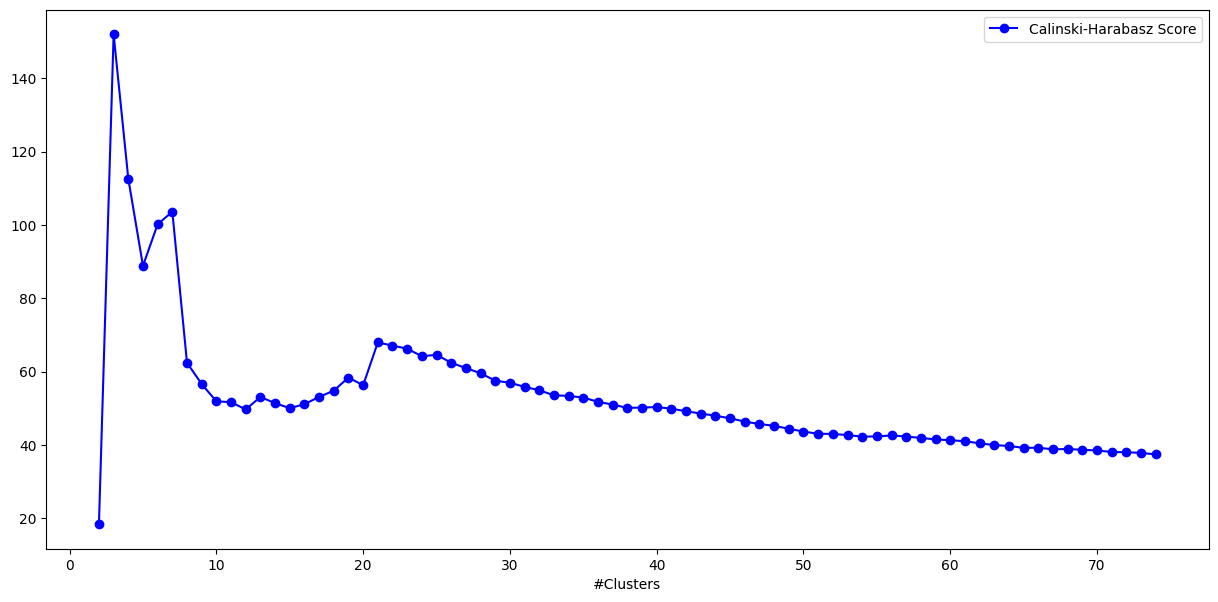

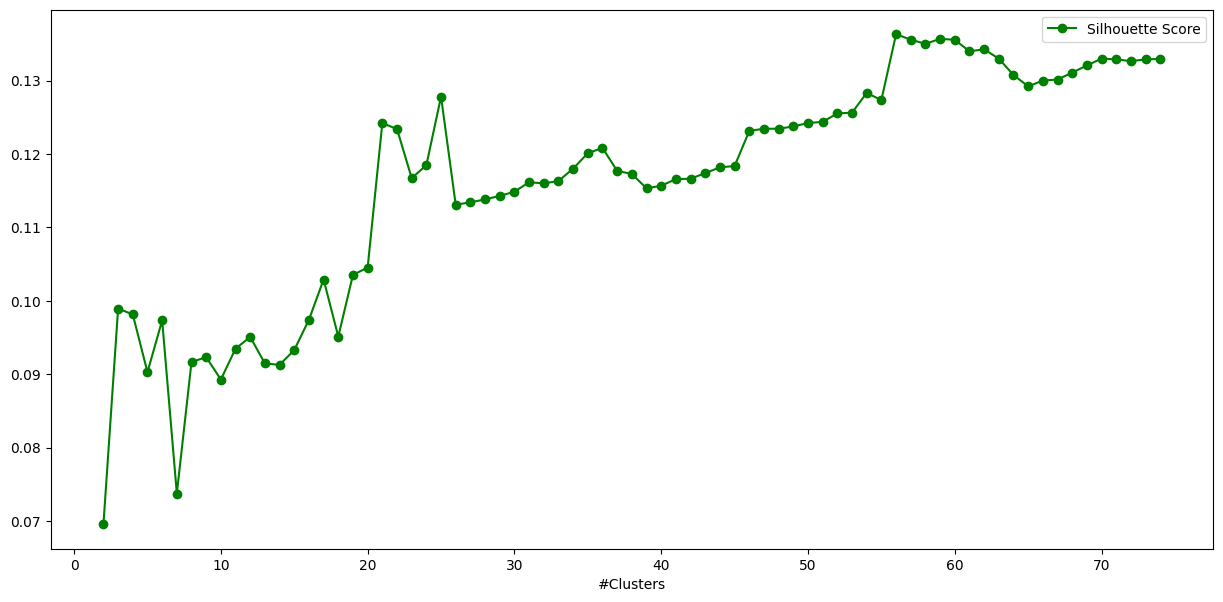

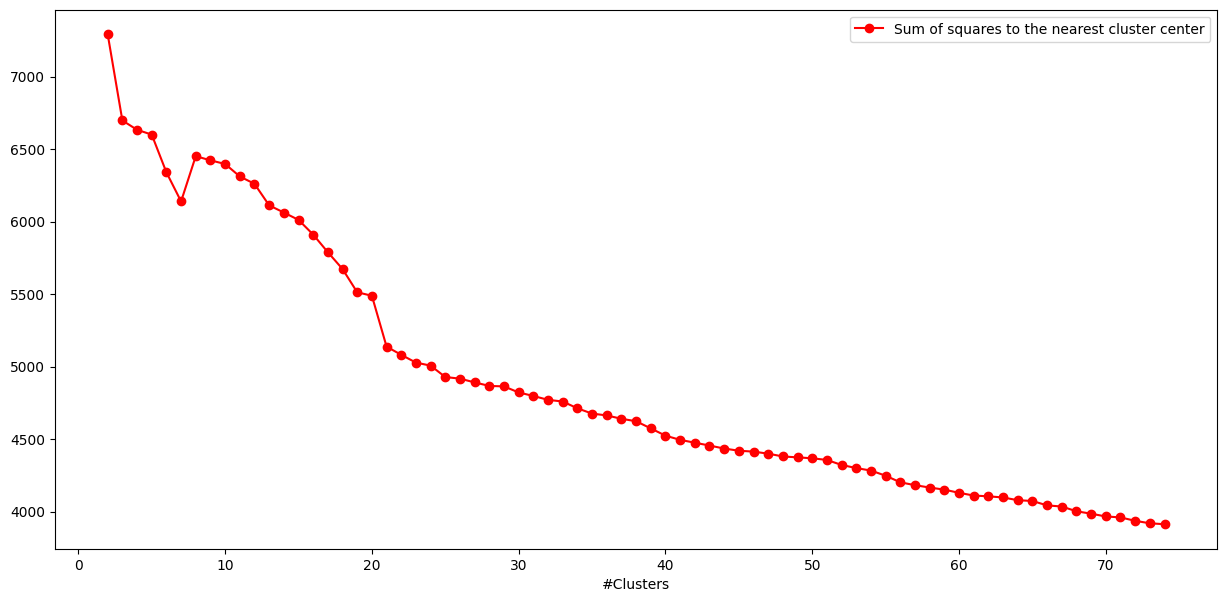

In [30]:
# plot cluster evaluation metrics over various number of clusters

plt.figure(figsize=(15,7))
plt.plot(range(cluster_range_start,cluster_range_stop),calinski_harabasz_result,'bo-',label="Calinski-Harabasz Score")
plt.xlabel("#Clusters")
plt.legend()

plt.figure(figsize=(15,7))
plt.plot(range(cluster_range_start,cluster_range_stop),silhouette_results,'go-',label="Silhouette Score")
plt.xlabel("#Clusters")
plt.legend()

plt.figure(figsize=(15,7))
plt.plot(range(cluster_range_start,cluster_range_stop),sse_result,'ro-',label="Sum of squares to the nearest cluster center")
plt.xlabel("#Clusters")
plt.legend()

plt.show()

In [31]:
# define a simple function to cluster data
def cluster_data_using_kmeans(num_of_clusters, input_data):
    kmeans_model = KMeans(n_clusters=num_of_clusters,random_state=42)
    kmeans_model.fit_predict(input_data)
    return kmeans_model

def print_b_number_of_sentences_from_the_computed_clusters(trained_model, orginal_tweet_dataset, number_of_tweets_to_print=10):
    clusters = []
    num_clusters = len(set(trained_model.labels_)) # compute the number of clusters by counting the number of unique labels in the model
    
    for kind in range(num_clusters):
        clusters.append(orginal_tweet_dataset[trained_model.labels_==kind])

    for cluster_index in range(num_clusters):
        print("\n\n-----------CLUSTER %d-----------" % cluster_index)
        for text_index in range(number_of_tweets_to_print):
            print(clusters[cluster_index].iloc[text_index].tweet_text)

In [32]:
k = 20 # see task five in the lab instructions (you should replace 2 with a more suitable number)
model_kmeans = cluster_data_using_kmeans(num_of_clusters=k, input_data=X_reduced)
print("Created %d number of cluster labels" % len(model_kmeans.labels_))

Created 3199 number of cluster labels


In [33]:
# print some clustered tweets (from each cluster)
print_b_number_of_sentences_from_the_computed_clusters(trained_model=model_kmeans, 
                                                       orginal_tweet_dataset=df_tweets,
                                                       number_of_tweets_to_print=20)



-----------CLUSTER 0-----------
surgeons seek repeal of transplant ban between hiv-positive people:  
more people stay 'connected' on vacation via web: study:  
many people with type 1 diabetes missing treatment goals: study:  
disaster-preparedness tips for people with disabilities:  
more vitamin d might help older people stay active:  
people who lived near world trade center report more lung disease:  
older people with dementia cared for mostly at home:  
people love talking about themselves, brain scans show:  
migraines more likely for people with celiac disease, study says:  
ct scans deliver more radiation to obese people: study:  
people carrying guns may appear bigger than they are:  
anxiety might help people sniff out threats:  
people stir up millions of bacteria when entering a room: study:  
people with autism may be better at processing information:  
some people more prone to drinking blackouts: study:  
survey shows people have little time for healthy habits:  
win

In [34]:
# function for plotting the mean of each feature of a CERTAIN CLUSTER and print the single word that is most frequent in the cluster
def plot_mean_feature_vector(df_cluster: pd.DataFrame, feature_name_list: list, cluster_ind: int):
    plt.plot(df_cluster.mean(axis=0).T, 'o-')
    plt.text(x=list(df_cluster.mean(axis=0).T).index(df_cluster.mean(axis=0).T.max())+30,
            y=df_cluster.mean(axis=0).T.max()+0.02,
            s="c"+str(cluster_ind)+":"+feature_name_list[list(df_cluster.mean(axis=0).T).index(df_cluster.mean(axis=0).T.max())])
    

In [35]:
# function for plotting ALL the cluster mean feature vectors (by calling the function plot_mean_feature_vector repeatedly)
def plot_all_cluster_mean_feature_vectors(trained_model, df_bag_of_words, feature_name_list, orginal_tweet_dataset):
    plt.figure(figsize=(25,8))
    clusters = []
    num_clusters = len(set(trained_model.labels_)) # compute the number of clusters by counting the number of unique labels in the model
    for kind in range(num_clusters):
        clusters.append(orginal_tweet_dataset[trained_model.labels_==kind])

    for cluster_index in range(num_clusters):
        plot_mean_feature_vector(df_cluster=df_bag_of_words[trained_model.labels_==cluster_index], 
                                 feature_name_list=X_feature_names, 
                                 cluster_ind=cluster_index)
    plt.show()

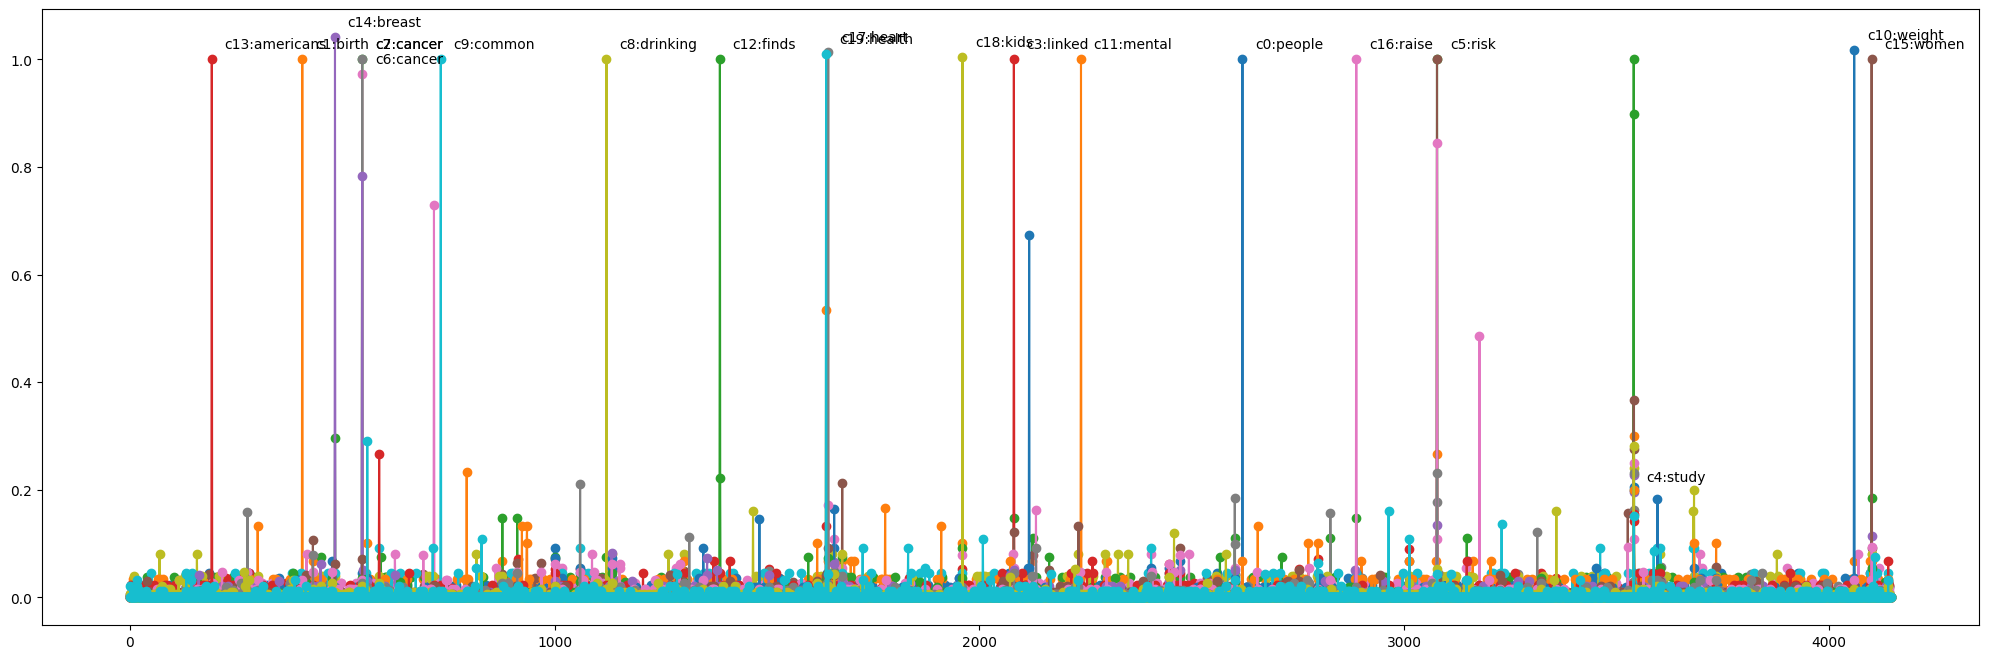

In [36]:
# plot the mean feature vector for each cluster (and the most frequent word in the cluster)
plot_all_cluster_mean_feature_vectors(trained_model=model_kmeans,
                                      df_bag_of_words=X,
                                      feature_name_list=X_feature_names,
                                      orginal_tweet_dataset=df_tweets)

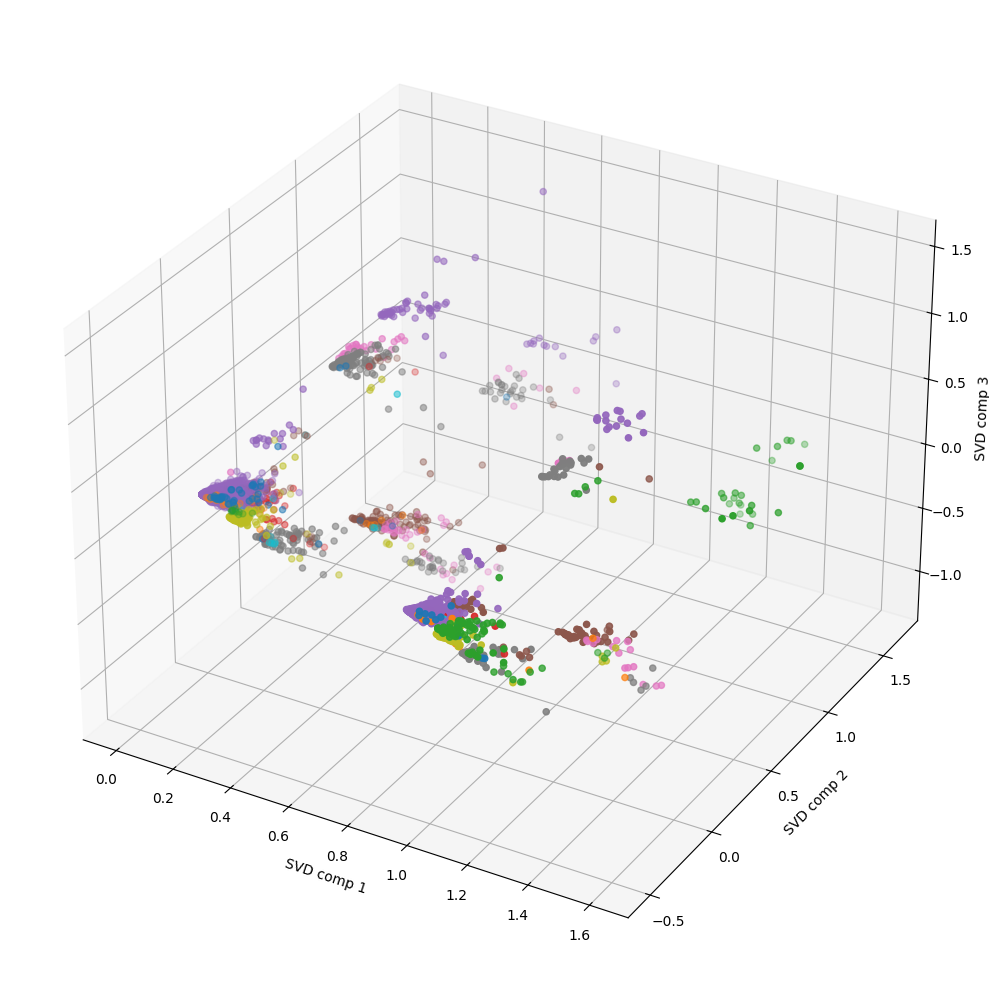

In [39]:
# Visualize clusters in three dimensions
svd_viz = TruncatedSVD(n_components=3)
svd_viz.fit(X)
X_3d = svd_viz.transform(X)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
for cluster_index in range(k):
    ax.scatter(X_3d[model_kmeans.labels_==cluster_index, 0],
               X_3d[model_kmeans.labels_==cluster_index, 1],
               X_3d[model_kmeans.labels_==cluster_index, 2], 
               marker='o')

ax.set_xlabel('SVD comp 1')
ax.set_ylabel('SVD comp 2')
ax.set_zlabel('SVD comp 3')

plt.tight_layout()